# Generate combined csv for MATLAB

In [ ]:
from openpyxl import load_workbook

# Areas to analyze
geo_names = ['Massachusetts',
             'New York',
             'New Jersey',
             'California',
             'Pennsylvania',
             'Washington',
             'Nevada',
             'Mississippi',
             'Missouri',
             'Wyoming',
             'Montana',
             'Alaska']

# GDP items to be analyzed
# 'All industry total'
gdp_types = ['Construction',
             'Transportation and warehousing',
             'Broadcasting (except Internet) and telecommunications',
             'Finance and insurance',
             'Health care and social assistance',
             'Arts, entertainment, and recreation']

def read_gdp(filename: str = 'gdp.xlsx') -> dict:
    '''Read GDP data from xlsx file'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]

    for geo in geo_names:
        ret[geo] = {}
        total = 0.0
        for row in sheet.rows:
            if row[1].value == geo:
                desc = str(row[3].value).strip()
                num = float(row[4].value) if not row[4].value == '' else 0
                if desc in gdp_types:
                    total += num
                if desc == 'All industry total':
                    ret[geo]['All industry total'] = num
        # ret[geo]['All tertiary industry total'] = total
        ret[geo]['All tertiary industry percentage'] = total / ret[geo]['All industry total']
    return ret

def read_population(filename: str = 'population.xlsx') -> dict:
    '''Read population data from xlsx file'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]
    for geo in geo_names:
        ret[geo] = {}
        for row in sheet.rows:
            if row[0].value == geo:
                # ret[geo]['Population'] = int(row[1].value)
                ret[geo]['Population Density'] = float(row[2].value)
                # ret[geo]['Density Rank'] = int(row[3].value)
    return ret

def read_limiting_magnitude(filename: str = 'limiting_magnitude.xlsx') -> dict:
    '''Reading limiting magnitude from xlsx'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]
    for geo in geo_names:
        ret[geo] = {}
        for row in sheet.rows:
            if row[0].value == geo:
                ret[geo]['Limiting Magnitude'] = float(row[1].value)
    return ret

def read_last_bus(filename: str = 'last_bus.xlsx') -> dict:
    '''Reading limiting magnitude from xlsx'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]
    for geo in geo_names:
        ret[geo] = {}
        for row in sheet.rows:
            if row[0].value == geo:
                ret[geo]['Last Bus'] = float(row[1].value)
    return ret

def read_power_consumption(filename: str = 'power_comsumption.xlsx') -> dict:
    '''Read power consumption data'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]
    for geo in geo_names:
        ret[geo] = {}
        for row in sheet.rows:
            if row[0].value == geo:
                ret[geo]['Power Consumption per Capita per Month'] = float(row[1].value)
    return ret

def read_annual_precipitation(filename: str = 'annual_precipitation.xlsx') -> dict:
    '''Read power consumption data'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]
    for geo in geo_names:
        ret[geo] = {}
        for row in sheet.rows:
            if row[0].value == geo:
                ret[geo]['Annual Precipitation(in millimetre)'] = float(row[2].value)
    return ret

def read_work_hours(filename: str = 'work_hours.xlsx') -> dict:
    '''Read power consumption data'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]
    for geo in geo_names:
        ret[geo] = {}
        for row in sheet.rows:
            if row[0].value == geo:
                ret[geo]['Work hours per Week'] = float(row[1].value)
    return ret

def read_nightlife_index(filename: str = 'nightlife_index.xlsx') -> dict:
    '''Read power consumption data'''
    ret = {}
    workbook = load_workbook(filename)
    sheet = workbook.worksheets[0]
    for geo in geo_names:
        ret[geo] = {}
        for row in sheet.rows:
            if row[0].value == geo:
                ret[geo]['Nightlife index'] = float(row[1].value)
    return ret

def read_all_data() -> dict:
    '''Read and combine all data'''
    all_data = [read_gdp('../data/GDP by State(tables only).xlsx'),
                read_population('../data/population-density-data-table.xlsx'),
                read_limiting_magnitude('../data/极限星等.xlsx'),
                read_last_bus('../data/公交末班车.xlsx'),
                read_power_consumption('../data/每月人均用电量.xlsx'),
                read_annual_precipitation('../data/年降水量.xlsx'),
                read_work_hours('../data/人均工作时长.xlsx'),
                read_nightlife_index('../data/夜生活谷歌搜索指数.xlsx')]
    ret = {}
    for item in all_data:
        for (geo, data) in item.items():
            if not geo in ret.keys():
                ret[geo] = {}
            ret[geo].update(data)
    return ret

def generate_csv() -> str:
    '''Generate csv content'''
    all_data = read_all_data()

    # generate title
    ret = 'Area'
    for k, v in all_data[geo_names[0]].items():
        ret += ', ' + k.replace(',', '')
    ret += '\n'

    # write data
    for geo, data in all_data.items():
        ret += geo
        for k, v in data.items():
            ret += ', ' + str(v)
        ret += '\n'
    return ret

with open('../data/combined.csv', 'w', encoding='utf-8') as f:
    f.write(generate_csv())

# Draw maps

[us-states.json](https://github.com/python-visualization/folium/blob/main/examples/data/us-states.json)

In [1]:
# read results and set color

from openpyxl import load_workbook
import numpy as np

workbook = load_workbook('../data/运行结果.xlsx')
sheet = workbook.worksheets[0]
result = {}
for row in sheet.rows:
    if not row[0].value == 'Area' and not row[0].value == '':
        # result[us_states[row[0].value]] = float(row[1].value)
        result[row[0].value] = float(row[1].value)

# sort
index = 0
for k, v in sorted(result.items(), key=lambda x:(x[1], x[0])):
    result[k] = float(index) / (len(result) - 1)
    index += 1

result

{'Massachusetts': 0.9090909090909091,
 'New York': 1.0,
 'New Jersey': 0.8181818181818182,
 'California': 0.7272727272727273,
 'Pennsylvania': 0.6363636363636364,
 'Washington': 0.5454545454545454,
 'Nevada': 0.36363636363636365,
 'Mississippi': 0.2727272727272727,
 'Missouri': 0.45454545454545453,
 'Wyoming': 0.0,
 'Montana': 0.18181818181818182,
 'Alaska': 0.09090909090909091}

In [2]:
# generate color
import matplotlib

cmap = matplotlib.cm.get_cmap('viridis')

def rgba2hex(rgba: tuple) -> str:
    '''Ignore Alpha channel'''
    ret = '#'
    for i in range(3):
        ret += hex(int(rgba[i] * 255)).replace('0x', '').zfill(2)
    return ret

def get_color(geo: str) -> str:
    if geo in result.keys():
        return rgba2hex(cmap(result[geo]))
    else:
        return rgba2hex(cmap(0))
        
get_color('Washington')

'#1e9a89'

In [17]:
# draw map
import os
import json
import folium
from folium import GeoJson

ignored = []

with open('us-states.json', 'r', encoding='utf-8') as f:
    states = json.load(f)

print(states['features'][49]['properties']['name'])

for i in range(len(states['features'])):
    state_name = states['features'][49 - i]['properties']['name']
    if not state_name in result.keys() or state_name in ignored:
        del states['features'][49 - i]

style_func = lambda x: {'color': '#000000', 'weight': 1, 'fillColor': get_color(x['properties']['name']), 'fillOpacity': 1}

map = folium.Map(tiles=None, location=[48, -102], zoom_start=3)

GeoJson(states, style_function=style_func).add_to(map)

map

Wyoming


# Plot for sensitivity analysis

In [25]:
# Initialize
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
save_img = True

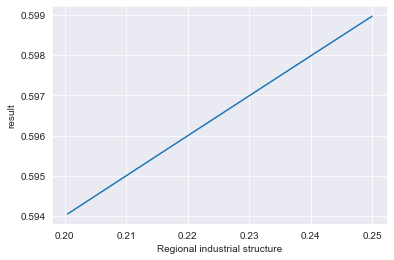

In [28]:
# Regional industrial structure
data = pd.read_csv('../data/Sensitivity Analysis/California Regional industrial structure.csv', header=0)
sns.lineplot(data=data, x='Regional industrial structure', y='result')
if save_img:
    plt.savefig(fname='Regional industrial structure.svg')
plt.show()

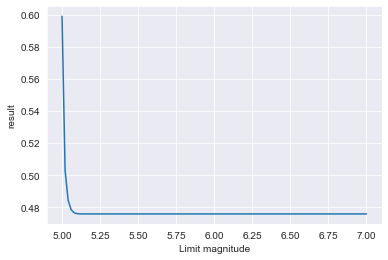

In [27]:
# Limit magnitude
data = pd.read_csv('../data/Sensitivity Analysis/California Limit magnitude.csv', header=0)
sns.lineplot(data=data, x='Limit magnitude', y='result')
if save_img:
    plt.savefig(fname='Limit magnitude.svg')
plt.show()